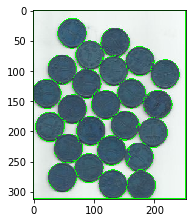

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('coins.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# cv2.imshow('img', thresh)
plt.subplot(121), plt.imshow(thresh)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
# cv2.imshow('opening', opening)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# cv2.imshow('f', sure_bg)
# plt.imshow(sure_bg)
# plt.subplot(131), plt.imshow(sure_fg), plt.title('sure foreground')

# plt.subplot(132), plt.imshow(sure_bg), plt.xticks([])
# plt.title('image')

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now mark the region of unknow with Zero
markers[unknown == 255] = 0
markers = cv2.watershed(img, markers)
img[markers == -1] = [0, 255, 0]
plt.imshow(markers)
plt.imshow(img)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()